# Défi quotidien : Traitement et analyse des données en Python


Ce que vous apprendrez
Techniques avancées de normalisation, de réduction et d’agrégation des données.
Compétences en matière de collecte, d'exploration, d'intégration et de nettoyage de données à l'aide de Python.
Maîtrise de l'utilisation de Pandas pour la manipulation de données complexes.


Votre tâche
Téléchargez et importez l' ensemble de données sur les salaires des emplois en science des données .
Normalisez la colonne « salaire » à l'aide de la normalisation Min-Max qui met à l'échelle toutes les valeurs de salaire entre 0 et 1.
Implémentez une réduction de dimensionnalité comme l'analyse en composantes principales (ACP) ou le t-SNE pour réduire le nombre de fonctionnalités (colonnes) dans l'ensemble de données.
Regroupez l'ensemble de données par la colonne « experience_level » et calculez le salaire moyen et médian pour chaque niveau d'expérience (par exemple, Junior, Mid-level, Senior).
Indice :
Pour rappel, la normalisation est essentielle pour traiter des données présentant des plages de valeurs différentes. Par exemple, les données salariales peuvent avoir une plage étendue (de 20 000 $ à 200 000 $). En mettant les données à l'échelle grâce à la normalisation Min-Max, vous vous assurez que toutes les valeurs salariales se situent dans une plage cohérente (de 0 à 1). Ceci est particulièrement utile lorsque les données sont utilisées dans des modèles de machine learning, car certains algorithmes (comme les k plus proches voisins ou les réseaux de neurones) sont plus performants lorsque les caractéristiques sont normalisées. Cela garantit qu'aucun salaire ne domine le processus d'apprentissage, ce qui rend l'analyse plus équilibrée.

La réduction de dimensionnalité permet de simplifier les ensembles de données complexes en réduisant le nombre de variables prises en compte. Cela facilite la gestion des données et permet d'éviter le problème de la dimensionnalité, un phénomène qui rend les modèles d'apprentissage automatique difficiles à traiter avec des données de grande dimension.
L'ACP, par exemple, permet de conserver les informations les plus importantes (variance) de l'ensemble de données tout en réduisant le bruit et la redondance.
Elle peut également accélérer le processus d'apprentissage des modèles et faciliter la visualisation des données dans un nombre réduit de dimensions.

L'agrégation des données permet de comprendre les tendances au sein des sous-groupes de l'ensemble de données.
Le calcul des salaires moyens et médians pour chaque niveau d'expérience permet de mieux comprendre la répartition et les disparités salariales entre les différents niveaux de poste. Ce type d'agrégation peut aider à répondre à des questions commerciales telles que « Comment le salaire évolue-t-il avec l'expérience ? » ou « Quelle est la répartition des salaires pour les postes de direction ? »

## 🔹 Étape 1 – Importer les bibliothèques et charger les données

In [2]:
import pandas as pd

# Chargement du jeu de données
df = pd.read_csv("datascience_salaries.csv")

# Affichage des premières lignes
df.head()


,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


## 🔹 Étape 2 – Normaliser la colonne « salary » avec Min-Max

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Appliquer la normalisation Min-Max
scaler = MinMaxScaler()
df['salary_normalized'] = scaler.fit_transform(df[['salary']])

# Vérification
df[['salary', 'salary_normalized']].head()


,salary,salary_normalized
0,149000,0.601010
1,120000,0.454545
2,68000,0.191919
3,120000,0.454545
4,149000,0.601010


## 🔹 Étape 3 – Réduction de dimensionnalité avec PCA

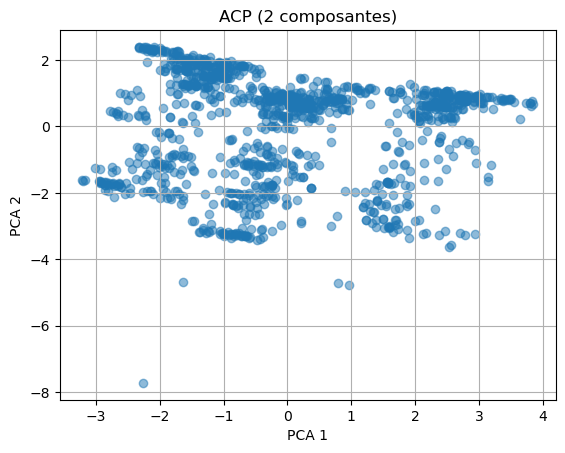

Variance expliquée cumulée : 0.0157


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Encodage des variables catégorielles
X = df.drop(columns=['salary', 'salary_normalized'])
X_encoded = pd.get_dummies(X, drop_first=True)

# Normalisation Z-score
X_scaled = StandardScaler().fit_transform(X_encoded)

# PCA à 2 composantes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisation
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("ACP (2 composantes)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

# Affichage de la variance expliquée
print("Variance expliquée cumulée :", round(pca.explained_variance_ratio_.sum(), 4))


## 🔹 Étape 4 – Agréger les données par experience_level

In [5]:
# Calcul du salaire moyen et médian par niveau d'expérience
agg = df.groupby('experience_level')['salary'].agg(['mean', 'median']).reset_index()
print(agg)


  experience_level          mean   median
0            Entry  36111.111111  30000.0
1        Executive  76076.923077  46000.0
2              Mid  51786.885246  51000.0
3           Senior  75088.033012  68000.0


## 🔹 Étape 5 – Visualisation des salaires par expérience

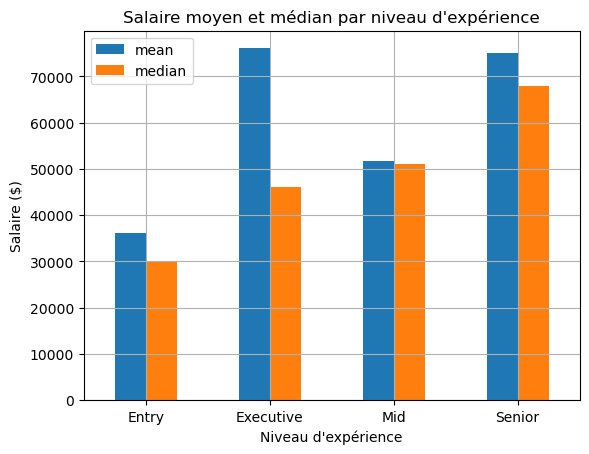

In [6]:
# Graphique des salaires moyens et médians
agg.plot(x='experience_level', kind='bar', rot=0)
plt.title("Salaire moyen et médian par niveau d'expérience")
plt.ylabel("Salaire ($)")
plt.xlabel("Niveau d'expérience")
plt.grid(True)
plt.show()


## Conclusion :

Le salaire augmente globalement avec l’expérience.

Les postes Senior et Executive ont une plus grande dispersion salariale (moyenne > médiane).

Les niveaux Entry et Mid sont plus homogènes.

L'analyse combinée de la moyenne et la médiane permet d’identifier les déséquilibres et les valeurs extrêmes.